# <center> Assignment #1
## <center>  Exploratory data analysis with Pandas


Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')#white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True,palette='Set2')


In [3]:
data = pd.read_csv('data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [4]:
men=data['sex'].value_counts().to_frame().reset_index().iloc[0,1]
women=data['sex'].value_counts().to_frame().reset_index().iloc[1,1]

There are men 21790, women 10771.


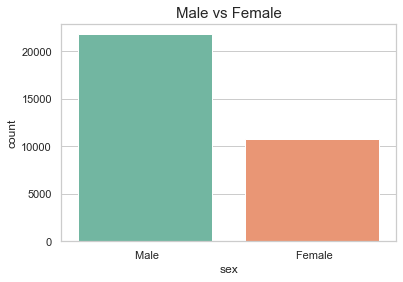

In [5]:
# data['sex'].value_counts().plot(kind='bar');

sns.countplot('sex', data=data)
plt.title('Male vs Female', size=15);
print('There are men {},'.format(men), 'women {}.'.format(women))

**2. What is the average age (*age* feature) of women?**

In [6]:
# You code here
m=data.groupby('sex')['age'].mean().to_frame().reset_index().iloc[0][1]
print('The average age of women is {} years old.'.format(m))

The average age of women is 36.85823043357163 years old.


**3. What is the percentage of USA citizens (*country* feature)?**

In [7]:
# You code here
a=len(data[data['country']==' United-States'])/len(data)
print('The percentage of USA citizens is {}'.format(a))

The percentage of USA citizens is 0.895857006848684


**4 & 5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?**

In [8]:
#more than 50k
b=data[data['salary']==' >50K']['age']
#less than 50k
c=data[data['salary']==' <=50K']['age']
print("The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
    round(b.mean()), round(b.std(), 1),
    round(c.mean()), round(c.std(), 1)))


The average age of the rich: 44 +- 10.5 years, poor - 37 +- 14.0 years.


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [40]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [43]:
data[data['salary']==' >50K']['education'].unique()==[' Bachelors',' Assoc-acdm', ' Assoc-voc',' Doctorate', ' Prof-school',' Masters']
print('No, it is not true')

No, it is not true


C:\Users\Rachel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


From the education situation who earn more than 50k, we know that there are some who have a education lower than high school education.

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [65]:
# Each Race
display(data.groupby(['race'])['age'].describe())

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


In [64]:
# Each Gender
display(data.groupby(['age'])['sex'].describe())

,count,unique,top,freq
age,,,,
17,395,2,Male,209
18,550,2,Male,282
19,712,2,Female,356
20,753,2,Male,390
21,720,2,Male,391
...,...,...,...,...
85,3,2,Male,2
86,1,1,Female,1
87,1,1,Male,1


In [68]:
df=data.groupby(['race', 'sex']).describe().reset_index()
c=df[df['race']==' Amer-Indian-Eskimo'].iloc[1]['age'][7]
print('The maximum age of men of Amer-Indian-Eskimo race is: \n{} years old.'.format(c))

The maximum age of men of Amer-Indian-Eskimo race is: 
82.0 years old.


**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [9]:
marital=data[data['salary']==' >50K'].groupby(['marital-status','sex'])['marital-status'].count().to_frame().unstack().reset_index()
marital.columns=['marital-status','Female', 'Male']
d=marital[['marital-status', 'Male']].iloc[1:4].sum()[1]/marital[['marital-status', 'Male']].sum()[1]
print('The proportion of married men who earn a lot greater is bigger,\n the proportion is {}'.format(d))

The proportion of married men who earn a lot greater is bigger,
 the proportion is 0.8953767637346143


**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [77]:
e=data['hours-per-week'].max()
print('The maximum number of hours a person works per week is {} hours'.format(e))

The maximum number of hours a person works per week is 99 hours


In [12]:
# You code here
#25 people works 99 hour a week
f=(data[data['hours-per-week']==data['hours-per-week'].max()]).shape[0]
print('{} people works 99 hours per work.'.format(f))
g=(data[data['hours-per-week']==99]['salary'].value_counts()/len(data[data['hours-per-week']==99]['salary']))[1]
print('The percentage of those who earn a lot (>50K) among them is {}.'.format(g))

85 people works 99 hours per work.
The percentage of those who earn a lot (>50K) among them is 0.29411764705882354.


**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*country*). What will these be for Japan?**

In [122]:
country=data[data['salary']==' <=50K'].groupby('country')['hours-per-week'].mean().sort_values(ascending=False).to_frame().reset_index()
h=country[country['country']==' Japan'].iloc[0,1]
print('People who earn a lot in Japan need to work {} per week averagely'.format(h))

People who earn a lot in Japan need to work 41.0 per week averagely


In [14]:
#average time of work of those who earn a little:
country2=data[data['salary']==' >50K'].groupby('country')['hours-per-week'].mean().sort_values(ascending=False).to_frame().reset_index()
i=country2[country2['country']==' Japan'].iloc[0,1]
print('People who earn a little in Japan need to work {} per week averagely'.format(round(i)))

People who earn a little in Japan need to work 48.0 per week averagely


In [95]:
# Average time of those who earn a lot
data[data['salary']==' >50K'].groupby('country')['hours-per-week'].mean().sort_values(ascending=False)

country
 Honduras              60.000000
 Thailand              58.333333
 South                 51.437500
 France                50.750000
 Greece                50.625000
 Columbia              50.000000
 Hungary               50.000000
 Yugoslavia            49.500000
 Ecuador               48.750000
 Ireland               48.000000
 Japan                 47.958333
 Iran                  47.500000
 Dominican-Republic    47.000000
 Taiwan                46.800000
 Scotland              46.666667
 Mexico                46.575758
 India                 46.475000
 Canada                45.641026
 ?                     45.547945
 United-States         45.505369
 Italy                 45.400000
 Hong                  45.000000
 El-Salvador           45.000000
 Germany               44.977273
 England               44.533333
 Philippines           43.032787
 Haiti                 42.750000
 Cuba                  42.440000
 Portugal              41.500000
 Jamaica               41.100000
 T

In [15]:
data.groupby(['country','salary'])['hours-per-week'].mean()

country         salary
 ?               <=50K    40.164760
                 >50K     45.547945
 Cambodia        <=50K    41.416667
                 >50K     40.000000
 Canada          <=50K    37.914634
                            ...    
 United-States   >50K     45.505369
 Vietnam         <=50K    37.193548
                 >50K     39.200000
 Yugoslavia      <=50K    41.600000
                 >50K     49.500000
Name: hours-per-week, Length: 82, dtype: float64

In [17]:
### elgant method:
import numpy as np
pd.crosstab(data['country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

# for (countries, salaries), sub_df in data.groupby(['native-country', 'salary']):
#     print(countries, salaries, round(sub_df['hours-per-week'].mean(), 2))

country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


**11. Plot 3 different visualizations with this given data and tell what you find out of them.**

- 1. Occupation distribution in United States


In [311]:
occ=df.groupby(['occupation','country'])['occupation'].count().to_frame().unstack()[('occupation', ' United-States')].to_frame().reset_index()

In [322]:
occ.columns=['occupation', 'counts']
occ=occ.sort_values(by='counts',ascending=False)

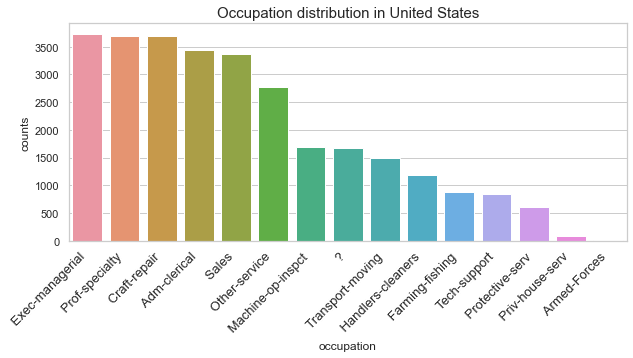

In [324]:
plt.figure(figsize=(10,4))
g=sns.barplot(occ['occupation'], occ['counts'])
g.set_xticklabels(g.get_xticklabels(),rotation=45, horizontalalignment='right', size=13);
g.set_title('Occupation distribution in United States', size=15);

In the United States, Exec-managerial, Prof-specialty, and Craft-repair are the top 3 occupation. Surprised not CS lol.

- 2. Top 10 occupations that works longest based on rich and poor

In [33]:
import numpy as np
cross=pd.crosstab(data['occupation'], data['salary'], values=data['hours-per-week'], aggfunc=np.mean).reset_index()
cross.columns

Index(['occupation', ' <=50K', ' >50K'], dtype='object', name='salary')

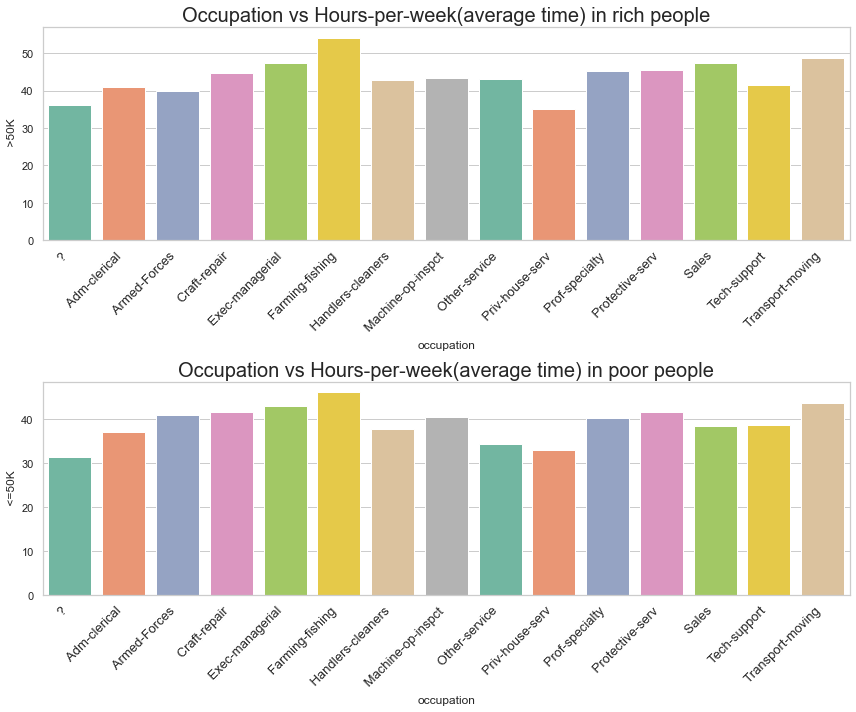

In [54]:
plt.figure(figsize=(12,10))
ax=plt.subplot(2,1,1)
plt.title('Occupation vs Hours-per-week(average time) in rich people',size=20)
ax=sns.barplot(x=cross['occupation'], y=cross[' >50K'], palette=("Set2"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', size=13);
ax2=plt.subplot(2,1,2)
plt.title('Occupation vs Hours-per-week(average time) in poor people',size=20)
ax2=sns.barplot(x=cross['occupation'], y=cross[' <=50K'], palette=("Set2"))
ax2.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', size=13);
plt.tight_layout()

- 3. Hours-per-week vs Salary

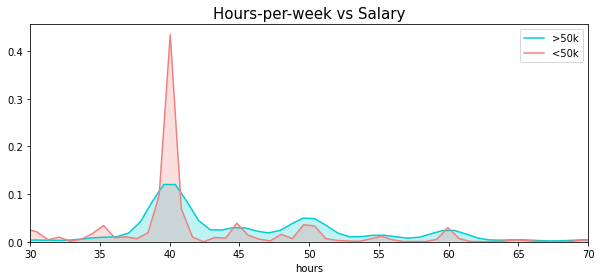

In [233]:
plt.figure(figsize=(10,4))
ax = sns.kdeplot(data["hours-per-week"][data.salary ==' >50K'], color="darkturquoise", shade=True)
ax2=sns.kdeplot(data["hours-per-week"][data.salary ==' <=50K'], color="lightcoral", shade=True)
plt.legend(['>50k', '<50k'])
plt.title('Hours-per-week vs Salary', size=15)
ax.set(xlabel='hours')
plt.xlim(30,70)
plt.show()

reference: 
Author: Yury Kashnitskyy Translated and edited by Sergey Isaev, Artem Trunov, Anastasia Manokhina, and Yuanyuan Pao. 